# Logistic regression

sigmoid 

## Introduction

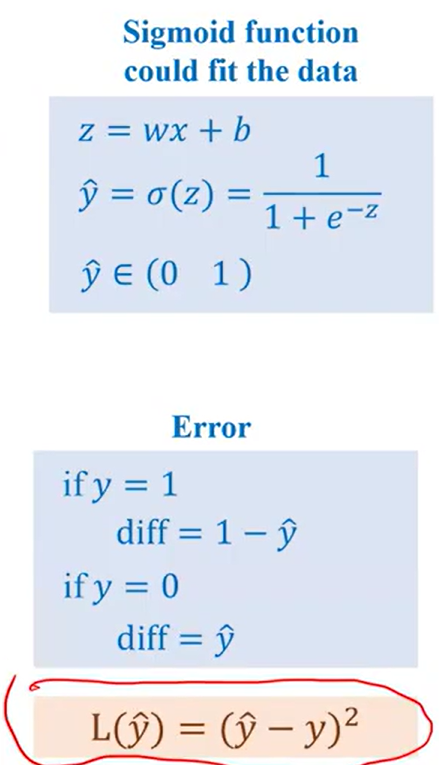

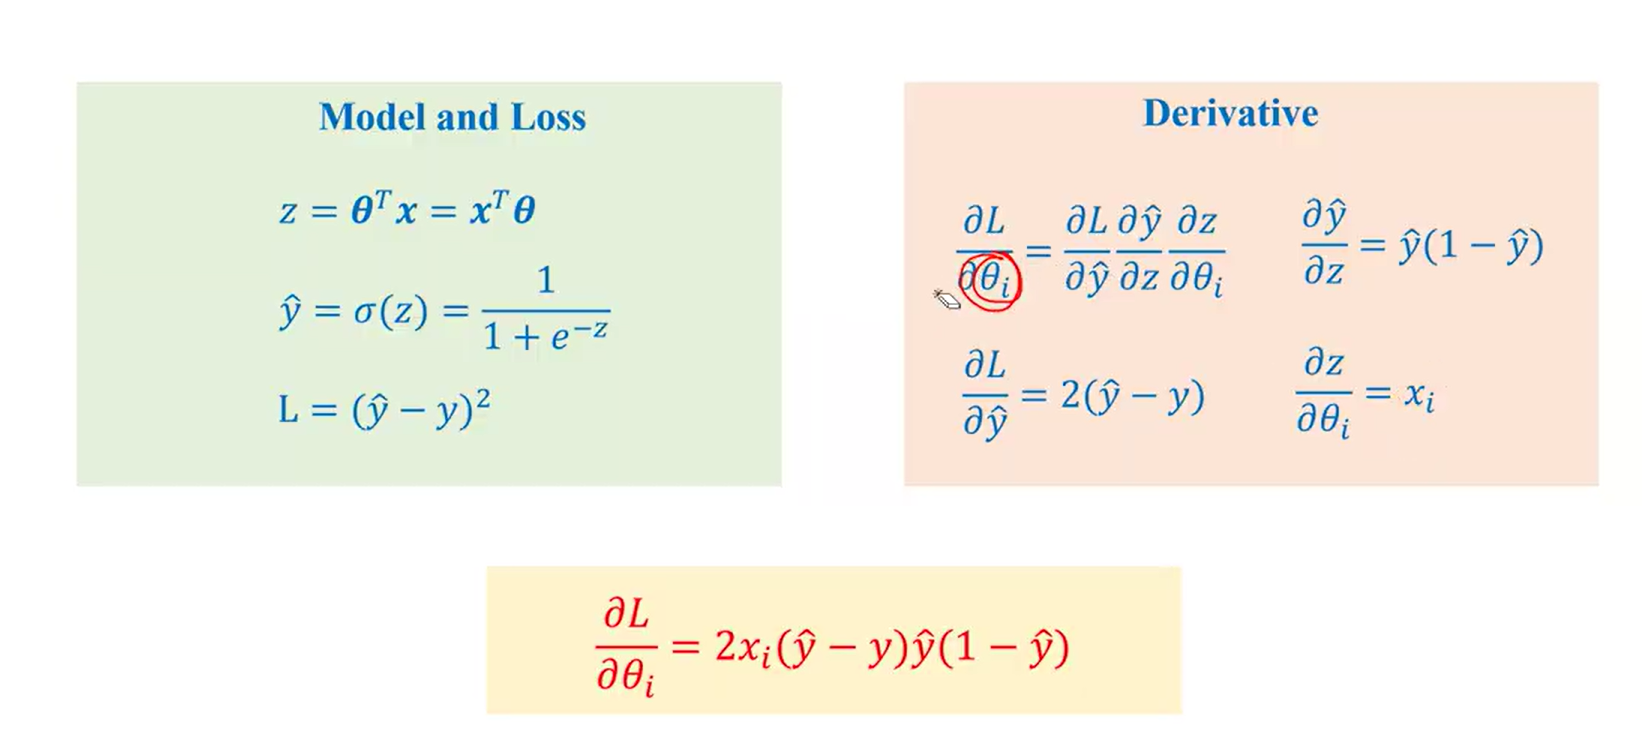

## Implementation

### Importing Libraries


In [165]:
import numpy as np
import matplotlib.pyplot as plt

### Read dataset

In [166]:
iris = np.genfromtxt('iris_1D.csv', delimiter=',', skip_header=1)
X = iris[:, :1]
y = iris[:, 1]
N = len(X)
X = np.hstack((np.ones((X.shape[0], 1)), X))
X

array([[1. , 1.4],
       [1. , 1. ],
       [1. , 1.5],
       [1. , 3. ],
       [1. , 3.8],
       [1. , 4.1]])

In [167]:
print(N)
print(X.shape)
print(y.shape)
print()
print(X)
print(y)


6
(6, 2)
(6,)

[[1.  1.4]
 [1.  1. ]
 [1.  1.5]
 [1.  3. ]
 [1.  3.8]
 [1.  4.1]]
[0. 0. 0. 1. 1. 1.]


### functions

In [168]:
def sigmoid_function(z):
    return 1/(1 + np.exp(-z))

def predict(x, theta):
    y_hat = sigmoid_function(np.dot(x, theta))
    return y_hat

def compute_loss(y_hat, y):
    return (y_hat - y)**2

def compute_gradient(x, y_hat, y):
    return 2*x*(y_hat - y)*y_hat*(1-y_hat)


### train


In [169]:
lr = 0.31
epochs_max = 5000
losses = []
accs = []
theta = np.array([0.1, 5])

for _ in range(epochs_max):

    for i in range(N):
        # get a sample
        Xi = X[i]
        yi = y[i]

        # predict z 
        y_hat = predict(Xi, theta)
        # compute loss 
        loss = compute_loss(y_hat, yi)
        losses.append(loss)

        # compute gradient
        gradient = compute_gradient(Xi, y_hat, yi)
        theta -= lr*gradient
    #accuracy for training
    preds = predict(X, theta).round()
    acc = (preds == y).mean()
    accs.append(acc)

### visualization


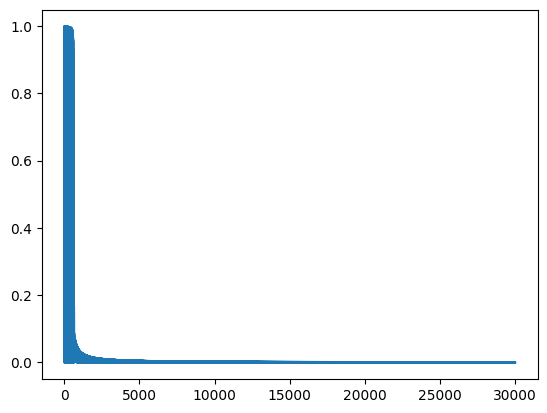

In [170]:
plt.plot(losses)